In [10]:
import polars as pl

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sql = pl.SQLContext()

In [11]:
df = pl.scan_csv('./result.csv')
sql.register('df', df)
df.collect()

datasetName,trainTestRatio,adjacencyMatrixThresholdValue,adjacencyMatrixLaplacianMatrix,inputLength,outputLength,modelName,modelConfig,maxEpoch,batchSize,learningRate,weightDecay,epoch,train_MAE,train_MSE,train_MAAPE,test_MAE,test_MSE,test_MAAPE,train_time,test_time,max_memory
str,f64,f64,str,i64,i64,str,str,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,0,37.442326,2565.883331,0.514035,28.77941,1501.719751,0.508647,1.125543,0.30525,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,1,31.393465,1852.072754,0.461061,26.17366,1242.825977,0.492619,0.707178,0.249555,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,2,30.299707,1742.752523,0.453048,24.513433,1181.57146,0.463497,0.751595,0.316789,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,3,29.344819,1671.840393,0.431229,24.502646,1152.510767,0.469698,0.783001,0.28943,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,4,28.858786,1600.515269,0.435027,25.214848,1172.172144,0.481001,0.767778,0.301336,76900352
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,95,0.051512,0.008244,0.151244,0.037433,0.004348,0.124151,1.415119,0.344381,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,96,0.051767,0.008207,0.155048,0.046807,0.005657,0.128104,1.419306,0.337443,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,97,0.051441,0.008095,0.153658,0.038813,0.004599,0.116783,1.40301,0.328207,6222586368


In [12]:
datasetNames = sql.execute(f"SELECT DISTINCT datasetName FROM df").collect().to_series().to_list()
modelNames = sql.execute(f"SELECT DISTINCT modelName FROM df").collect().to_series().to_list()

print(datasetNames)
print(modelNames)

['Chickenpox', 'JP-Pref', 'METR-LA', 'NOAA1000', 'PEMS-BAY', 'PEMS03', 'PEMS04', 'PEMS07', 'PEMS08', 'PEMSD7', 'US-Regions', 'US-States', 'Uzel2022']
['ASTGCN', 'DCRNN', 'GWNet', 'ARMA', 'GRU', 'LSTM', 'RNN', 'VAR', 'DSTAGNN', 'DGCRN', 'STGODE', 'AGCRN']


In [13]:
# reorder
modelNames = [
    'ARMA',
    'VAR',
    'RNN',
    'LSTM',
    'GRU',
    'ASTGCN',
    'DCRNN',
    'GWNet',
    'AGCRN',
    'DGCRN',
    #'DSTAGNN',
    #'STGODE',
]

datasetNames= [
    'METR-LA',
    'PEMS-BAY',
    'PEMS07',
    'PEMSD7',
    'NOAA1000',
    'Uzel2022',
]

In [14]:
pivot_result = [[
    sql.execute(f"""
        SELECT inputLength, outputLength, AVG(test_MAAPE) AS test_MAAPE
        FROM df
        WHERE
            modelName = '{modelName}'
            AND datasetName = '{datasetName}'
            AND test_MAAPE >= 0.01
            AND NOT epoch < 2
        GROUP BY inputLength, outputLength
        ORDER BY inputLength, outputLength
    """).collect().pivot(index='inputLength', columns='outputLength', values='test_MAAPE')
    for modelName in modelNames]
        for datasetName in datasetNames]

print(f'pivot_result.shape=({len(pivot_result)},{len(pivot_result[0])})')

pivot_result.shape=(6,10)


In [15]:
for row, datasetName in enumerate(datasetNames):
    for col, modelName in enumerate(modelNames):
        print(f'{datasetName} {modelName}')
        print(pivot_result[row][col])
    print('-'*80)

METR-LA ARMA
shape: (4, 5)
┌─────────────┬──────────┬──────────┬──────────┬──────────┐
│ inputLength ┆ 6        ┆ 12       ┆ 18       ┆ 24       │
│ ---         ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ i64         ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞═════════════╪══════════╪══════════╪══════════╪══════════╡
│ 6           ┆ 0.044055 ┆ 0.050134 ┆ 0.055995 ┆ 0.061792 │
│ 12          ┆ 0.043892 ┆ 0.050471 ┆ 0.055994 ┆ 0.061827 │
│ 18          ┆ 0.043875 ┆ 0.050071 ┆ 0.056151 ┆ 0.061914 │
│ 24          ┆ 0.043908 ┆ 0.050122 ┆ 0.056126 ┆ 0.06192  │
└─────────────┴──────────┴──────────┴──────────┴──────────┘
METR-LA VAR
shape: (4, 5)
┌─────────────┬──────────┬──────────┬──────────┬──────────┐
│ inputLength ┆ 6        ┆ 12       ┆ 18       ┆ 24       │
│ ---         ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ i64         ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞═════════════╪══════════╪══════════╪══════════╪══════════╡
│ 6           ┆ 0.066661 ┆ 0.072958 ┆ 0.077418 

In [16]:
_datasetNames = datasetNames[:]
_modelNames = modelNames[:]

model_minmax_range = {}

for col, modelName in enumerate(_modelNames):
    model_min = float('inf')
    model_max = -float('inf')

    for row, datasetName in enumerate(_datasetNames):
        _temp = pivot_result[row][col][:, 1:].to_numpy()
        heatmap_min = _temp.min()
        heatmap_max = _temp.max()

        if heatmap_min < model_min:
            model_min = heatmap_min
        if heatmap_max > model_max:
            model_max = heatmap_max
    
    model_minmax_range[modelName] = [model_min, model_max]

print(f'{model_minmax_range=}')

model_minmax_range={'ARMA': [0.015047393107633558, 0.2322869118379087], 'VAR': [0.035632466311273814, 0.3224336886048867], 'RNN': [0.03199836270616499, 0.3393888213255439], 'LSTM': [0.030633842714361287, 0.3398293725768542], 'GRU': [0.03018172818608916, 0.2962750941514968], 'ASTGCN': [0.02019071546199938, 0.26285193138280694], 'DCRNN': [0.03233169077753985, 0.38085617953721357], 'GWNet': [0.018200172974656256, 0.2585639934226566], 'AGCRN': [0.018874996849252368, 0.3489936114921513], 'DGCRN': [0.01810422656989196, 0.34153366935683566]}


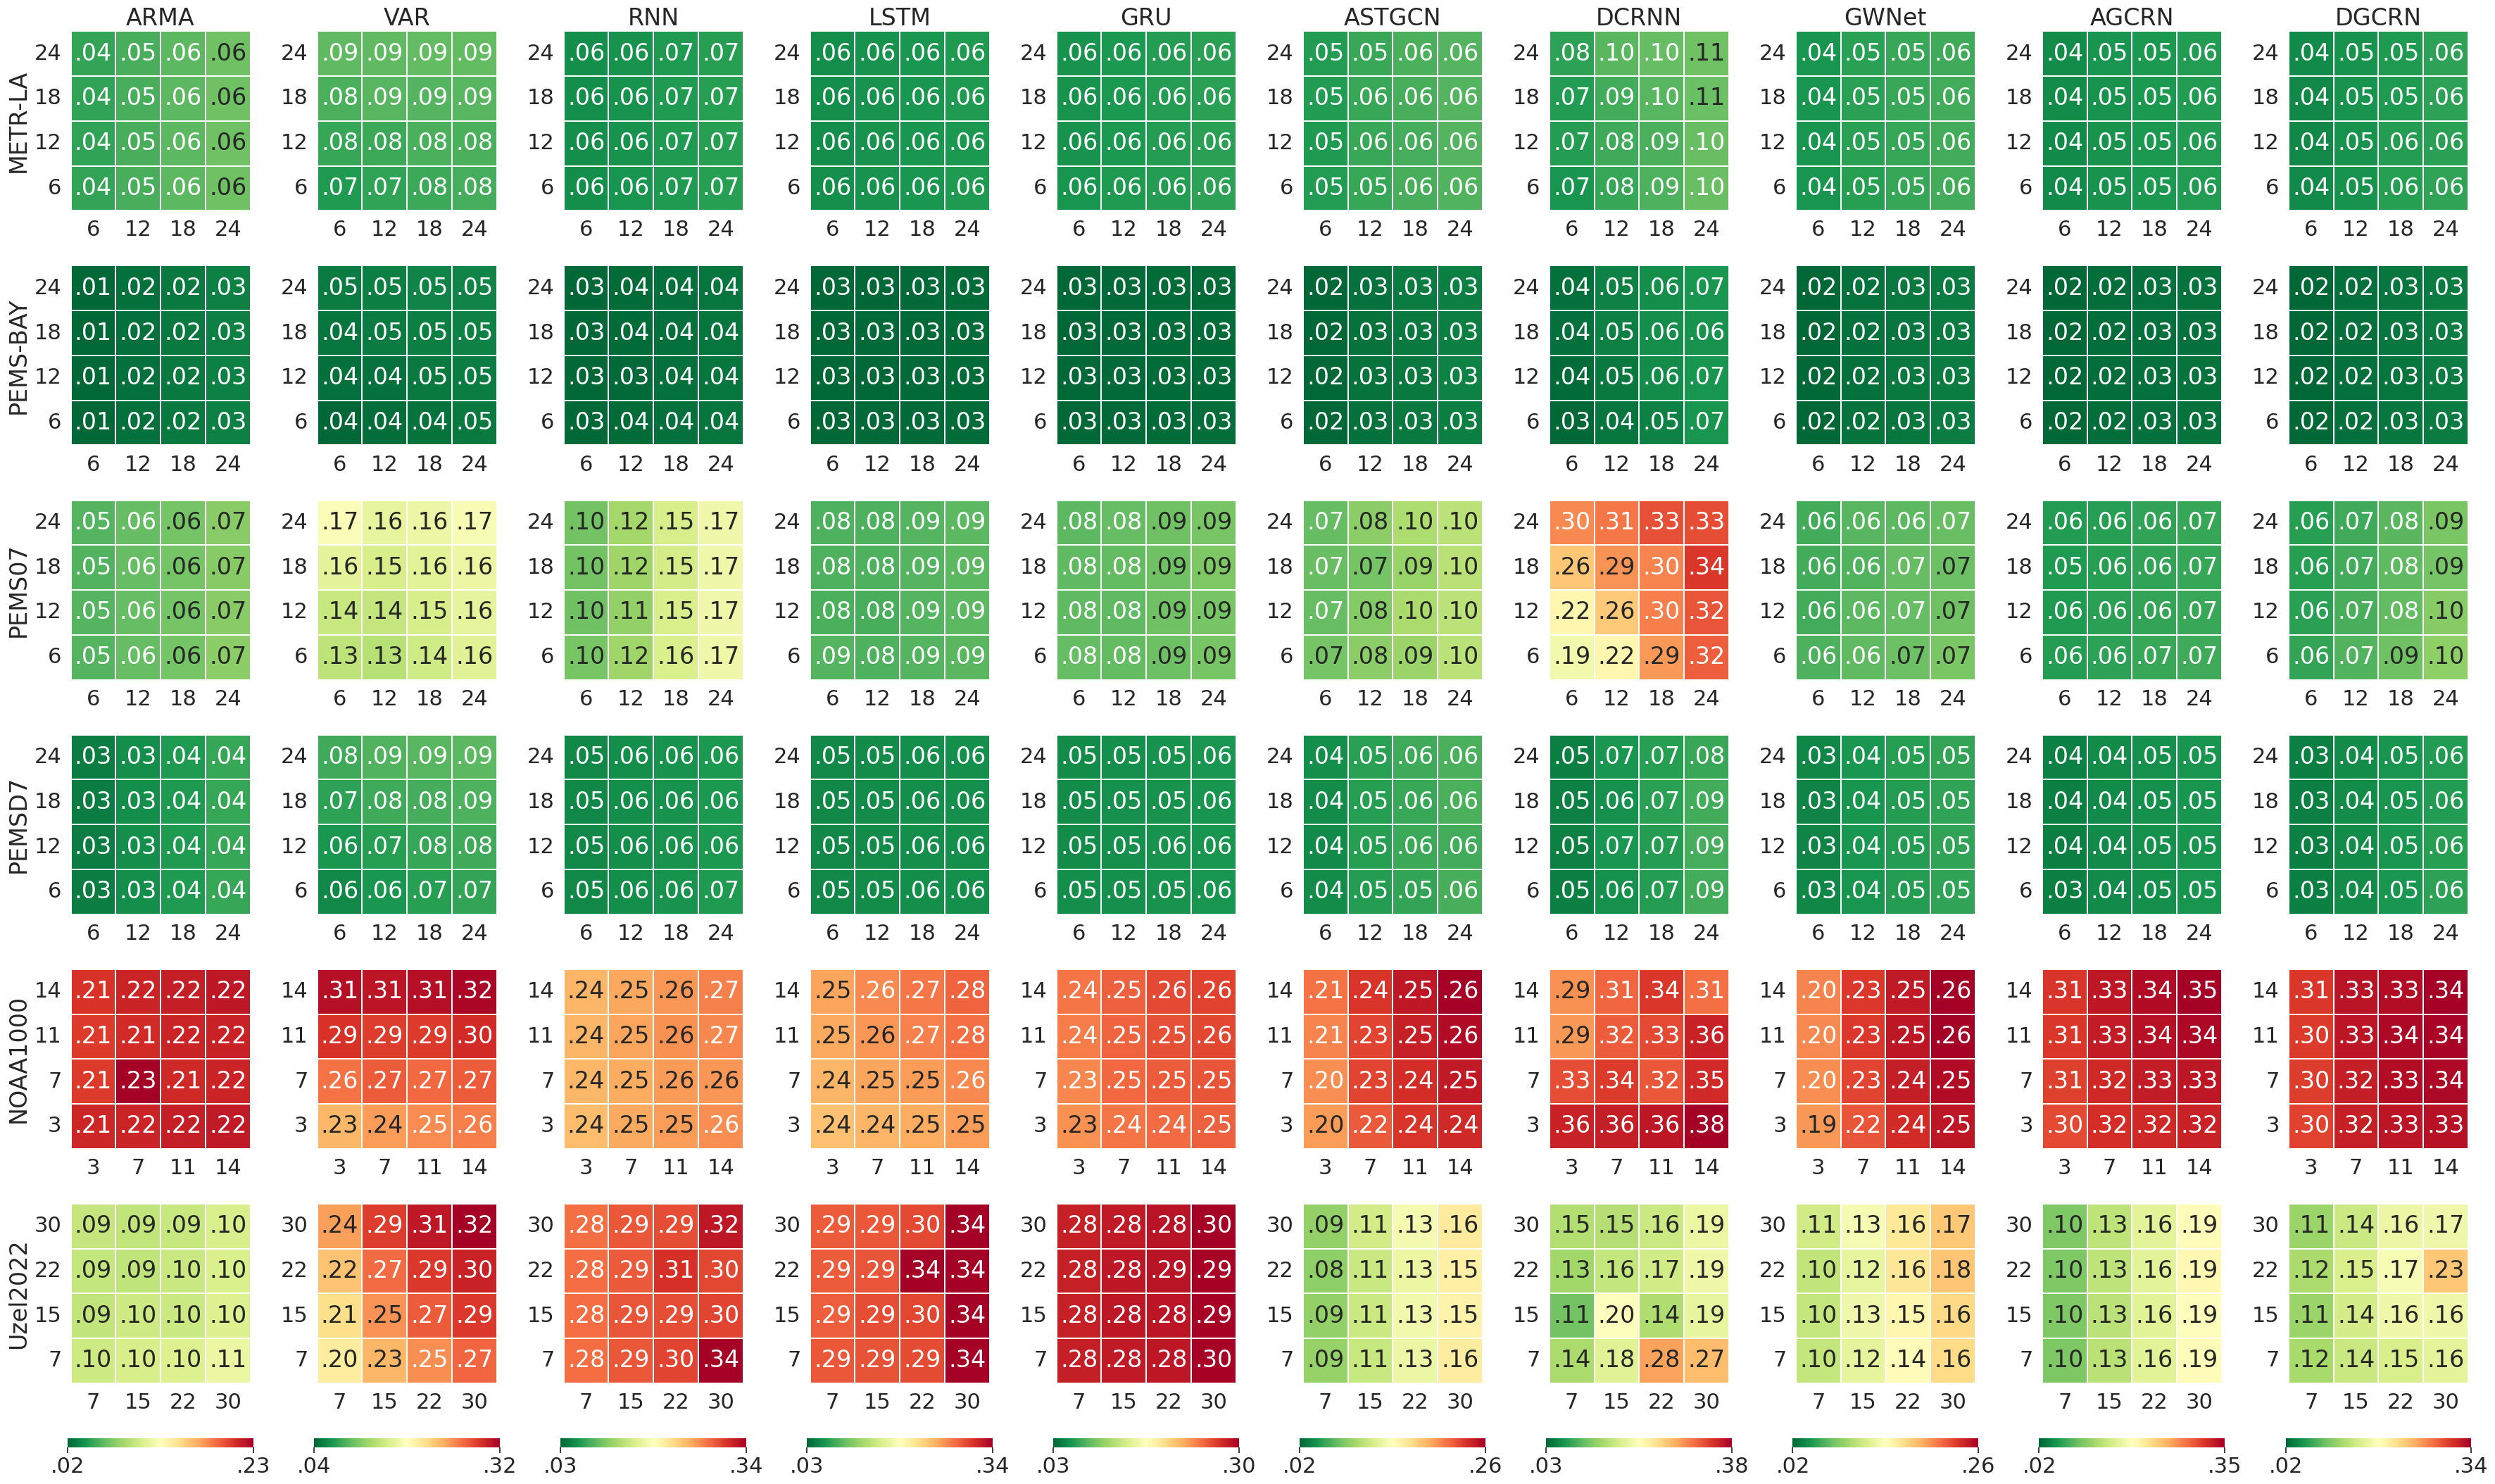

In [19]:
sns.set(font_scale=2)

_datasetNames = datasetNames[:]
_modelNames = modelNames[:]

fig = plt.figure(figsize=(3.6*len(_modelNames), 3.6*len(_datasetNames)))

gs = gridspec.GridSpec(
    len(_datasetNames)+1, len(_modelNames),
    width_ratios=[1]*len(_modelNames),
    height_ratios=[1]*len(_datasetNames)+[0.05],
    )

for row, datasetName in enumerate(_datasetNames):
    for col, modelName in enumerate(_modelNames):
        table = pivot_result[row][col]

        vmin = model_minmax_range[modelName][0]
        vmax = model_minmax_range[modelName][1]

        # x축과 y축 tick에 작성될 label들
        # polars는 pandas와 다르게 index가 따로 없어서 이걸 수동으로 줘야 함
        xticklabels=table.columns[1:]
        yticklabels=table[:, 0]

        ax = plt.subplot(gs[row, col])

        cbar_on = (row == len(_datasetNames)-1)

        if cbar_on:
            cbar_ax = plt.subplot(gs[-1, col])

        g = sns.heatmap(
            data=table[:, 1:].to_numpy(),
            ax=ax,

            # formatting
            annot=True,
            # fmt='' # 밑에 함수가 있으니 이 부분은 비워둔다
            linewidths=.1,

            # colormap
            cmap='RdYlGn_r',
            vmin=vmin,
            vmax=vmax,

            # colorbar
            cbar=cbar_on,
            cbar_ax=cbar_ax if cbar_on else None,
            cbar_kws={
                "orientation": "horizontal",
                "ticks": [vmin,vmax],
                },
        )

        # 각각의 cell에 대해 formatting
        for text in ax.texts:
            text.set_text(f'{float(text.get_text()):.2f}'.lstrip('0'))

        # cbar에 대해 formatting
        if cbar_on:
            cbar = g.collections[0].colorbar
            cbar.formatter = plt.FuncFormatter(lambda x, _: f'{x:.2f}'.lstrip('0'))
            cbar.update_ticks()

        ax.set_xticklabels(xticklabels, rotation=0)
        ax.set_yticklabels(yticklabels, rotation=0)

        g.set_facecolor('black')

        g.set_xlabel(None)

        if row == 0:
            g.set_title(f"{modelName}")
        else:
            g.set_title(None)

        if col == 0:
            g.set_ylabel(f"{datasetName}")
        else:
            g.set_ylabel(None)

        ax.set_aspect('equal') # important!

        ax = ax.invert_yaxis()


fig.tight_layout()

plt.savefig("./figure/05-T_in_T_out_comparison.pdf", format="pdf", bbox_inches='tight')
plt.show()